# Donors Choose -  Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

from scipy.sparse import hstack



<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [2]:
data = pd.read_csv('preprocessed_data.csv',nrows = 50000)
print("DONORS CHOOSE DATASET")
print("The shape of the data being used is ", data.shape)
data.head(3)


DONORS CHOOSE DATASET
The shape of the data being used is  (50000, 9)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


In [3]:
y = data['project_is_approved'].values
X= data.drop(['project_is_approved'],axis = 1)
print("The shapes of X is",X.shape)
print("The shape of y is ",y.shape)
#y #Array is created
X.head(3)


The shapes of X is (50000, 8)
The shape of y is  (50000,)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, stratify = y)
print("Shapes of the data is:")
print("X_train:", X_train.shape)
print("X-test:", X_test.shape)

print("\nY_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

#Further split the train data to Dtrain and Dcv. Will use these for encoding numerical, categrical and text features.
#Wont be needed as we are using RandomSearch CV for hyper paramter training
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size = 0.33, stratify = Y_train)
    

Shapes of the data is:
X_train: (33500, 8)
X-test: (16500, 8)

Y_train: (33500,)
Y_test: (16500,)


<h2>1.3 Make Data Model Ready: encoding essay</h2>

In [5]:
#Encoding/Vectorizing Essay
#Bag of Words (bow)
#Can take a couple of seconds to copute the result. If it takes too long(more than a minute, close the Notebook and try again)

from sklearn.feature_extraction.text import CountVectorizer


vectorizer_essay_1 = CountVectorizer(min_df = 10, ngram_range=(1,4), max_features = 5000)
vectorizer_essay_1.fit(X_train['essay'].values)

#print(vectorizer_essay_1.get_feature_names())

X_train_bow = vectorizer_essay_1.transform(X_train['essay'].values)
#X_cv_bow = vectorizer_essay_1.transform(X_cv['essay'].values)
X_test_bow = vectorizer_essay_1.transform(X_test['essay'].values)

print("Shapes of the data after vectorization is :")
print("X_train,y_train:", X_train_bow.shape, Y_train.shape)
print("X_test, Y_test ", X_test_bow.shape, Y_test.shape)


Shapes of the data after vectorization is :
X_train,y_train: (33500, 5000) (33500,)
X_test, Y_test  (16500, 5000) (16500,)


In [6]:
#Encoding/Vectorizing Essay
#tf_idf Vectorizer
#Comment : takes a few seconds to compute the result

from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer_essay_2 = TfidfVectorizer(min_df = 10, ngram_range=(1,4), max_features = 5000)
vectorizer_essay_2.fit(X_train['essay'].values)

#print(vectorizer.get_feature_names())

X_train_tfidf = vectorizer_essay_2.transform(X_train['essay'].values)
#X_cv_tfidf = vectorizer_essay_2.transform(X_cv['essay'].values)
X_test_tfidf = vectorizer_essay_2.transform(X_test['essay'].values)

print("\nShapes of the data after vectorization is :")
print("x_train,y_train:", X_train_tfidf.shape, Y_train.shape)
#print("x_cv, y_cv:    ", X_cv_tfidf.shape, Y_cv.shape)
print("X_test, y_test ", X_test_tfidf.shape, Y_test.shape)



Shapes of the data after vectorization is :
x_train,y_train: (33500, 5000) (33500,)
X_test, y_test  (16500, 5000) (16500,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [7]:
#Encoding Categorical Features
# Teacher Prefix -OneHotEncoding

print("Teacher_prefix - One Hot Encoding")
vectorizer_tea_pre = CountVectorizer()
vectorizer_tea_pre.fit(X_train['teacher_prefix'].values)
print(vectorizer_tea_pre.get_feature_names())

X_train_tea_pre_ohe = vectorizer_tea_pre.transform(X_train['teacher_prefix'].values)
#X_cv_tea_pre_ohe = vectorizer_tea_pre.transform(X_cv['teacher_prefix'].values)
X_test_tea_pre_ohe = vectorizer_tea_pre.transform(X_test['teacher_prefix'].values)

print("\nShapes of data")
print(X_train_tea_pre_ohe.shape)
#print(X_cv_tea_pre_ohe.shape)
print(X_test_tea_pre_ohe.shape)

Teacher_prefix - One Hot Encoding
['dr', 'mr', 'mrs', 'ms', 'teacher']

Shapes of data
(33500, 5)
(16500, 5)


In [8]:
#project_grade_category 
#One Hot Encoding
print("project_grade_category - One Hot Encoding")

vectorizer_pro_gra_ohe = CountVectorizer()
vectorizer_pro_gra_ohe.fit(X_train['project_grade_category'].values)
print(vectorizer_pro_gra_ohe.get_feature_names())


X_train_pro_gra_ohe = vectorizer_pro_gra_ohe.transform(X_train['project_grade_category'].values)
#X_cv_pro_gra_ohe = vectorizer_pro_gra_ohe.transform(X_cv['project_grade_category'].values)
X_test_pro_gra_ohe = vectorizer_pro_gra_ohe.transform(X_test['project_grade_category'].values)

print("\nShapes of the data:")
print(X_train_pro_gra_ohe.shape)
#print(X_cv_pro_gra_ohe.shape)
print(X_test_pro_gra_ohe.shape)

project_grade_category - One Hot Encoding
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']

Shapes of the data:
(33500, 4)
(16500, 4)


In [12]:
#school_state 
#One Hot Encoding

print("school_state - One Hot Encoding\n")
vectorizer_state_ohe = CountVectorizer()
vectorizer_state_ohe.fit(X_train['school_state'].values)
print(vectorizer_state_ohe.get_feature_names())

X_train_state_ohe = vectorizer_state_ohe.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer_state_ohe.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state_ohe.transform(X_test['school_state'].values)

print("\nShapes of data")
print(X_train_state_ohe.shape)
#print(X_cv_state_ohe.shape)
print(X_test_state_ohe.shape)

school_state - One Hot Encoding

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']

Shapes of data
(33500, 51)
(16500, 51)


In [13]:
#clean_categories 
#One Hot Encoding
print("clean_categories - One Hot Encoding/n")

vectorizer_clean_cat_ohe = CountVectorizer()
vectorizer_clean_cat_ohe.fit(X_train['clean_categories'].values)
print(vectorizer_clean_cat_ohe.get_feature_names())

X_train_clean_cat_ohe = vectorizer_clean_cat_ohe.transform(X_train['clean_categories'].values)
#X_cv_clean_cat_ohe = vectorizer_clean_cat_ohe.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer_clean_cat_ohe.transform(X_test['clean_categories'].values)

print("\nShapes of data")
print(X_train_clean_cat_ohe.shape)
#print(X_cv_clean_cat_ohe.shape)
print(X_test_clean_cat_ohe.shape)

clean_categories - One Hot Encoding/n
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']

Shapes of data
(33500, 9)
(16500, 9)


In [14]:
# Numerical Features
#Price
#Normalization is used

from sklearn.preprocessing import Normalizer

print("Price - NUmerical Data - Normalizer used for encoding\n")

normalizer_price_norm= Normalizer()
normalizer_price_norm.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer_price_norm.transform(X_train['price'].values.reshape(1,-1))
#X_cv_price_norm = normalizer_price_norm.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer_price_norm.transform(X_test['price'].values.reshape(1,-1))


#print(X_train_price_norm)
#print(X_train_price_norm.reshape(-1,1))
#print(X_train_price_norm.shape)

X_train_price_norm = X_train_price_norm.reshape(-1,1)
#X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print(X_train_price_norm.shape)
#print(X_cv_price_norm.shape)
print(X_test_price_norm.shape)


Price - NUmerical Data - Normalizer used for encoding

(33500, 1)
(16500, 1)


In [15]:
# Numerical Features
#teacher_number_of_previously_posted_projects called as teach_proj_norm for reference
#https://imgur.com/ldZA1zg
#Normalization is used

from sklearn.preprocessing import Normalizer

print("Teacher_number_of_previously_posted_projects - Numerical Feature - NOrmaizer used\n")

normalizer_teach_proj_norm= Normalizer()
normalizer_teach_proj_norm.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teach_proj_norm = normalizer_teach_proj_norm.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#X_cv_teach_proj_norm = normalizer_teach_proj_norm.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teach_proj_norm = normalizer_teach_proj_norm.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))


#print(X_train_teach_proj_norm)
#print(X_train_teach_proj_norm.reshape(-1,1))
#print(X_train_teach_proj_norm.shape)

X_train_teach_proj_norm = X_train_teach_proj_norm.reshape(-1,1)
#X_cv_teach_proj_norm = X_cv_teach_proj_norm.reshape(-1,1)
X_test_teach_proj_norm = X_test_teach_proj_norm.reshape(-1,1)

#print(X_train_teach_proj_norm)
print(X_train_teach_proj_norm.shape)
#print(X_cv_teach_proj_norm.shape)
print(X_test_teach_proj_norm.shape)

Teacher_number_of_previously_posted_projects - Numerical Feature - NOrmaizer used

(33500, 1)
(16500, 1)




<h2>Concatinating all the features</h2>


In [16]:
#merging two sparse matrices 
#https://stackoverflow.com/a/19710648/4084039
#using hstack for horixontal stack

# Set 1- categorical, numerical features + preprocessed_eassay (BOW)

from scipy.sparse import hstack

X_tr_1 = hstack((X_train_bow, X_train_tea_pre_ohe, X_train_pro_gra_ohe, X_train_state_ohe, X_train_clean_cat_ohe, X_train_price_norm, X_train_teach_proj_norm))
#X_cv_1 = hstack((X_cv_bow, X_cv_tea_pre_ohe, X_cv_pro_gra_ohe, X_cv_state_ohe, X_cv_clean_cat_ohe, X_cv_price_norm, X_cv_teach_proj_norm))
X_te_1 = hstack((X_test_bow, X_test_tea_pre_ohe, X_test_pro_gra_ohe, X_test_state_ohe, X_test_clean_cat_ohe, X_test_price_norm, X_test_teach_proj_norm))

print("SET 1 - BOW implementation")
print("Shape of data after concatinating all encoded features")
print("X_tr_1:",X_tr_1.shape)
#print(X_cv_1.shape)
print("X_te_1", X_te_1.shape)


SET 1 - BOW implementation
Shape of data after concatinating all encoded features
X_tr_1: (33500, 5071)
X_te_1 (16500, 5071)


In [17]:
#merging two sparse matrices 
#https://stackoverflow.com/a/19710648/4084039
#using hstack for horixontal stack

# Set 2- categorical, numerical features + preprocessed_eassay (TfIdf)

from scipy.sparse import hstack
X_tr_2 = hstack((X_train_tfidf, X_train_tea_pre_ohe, X_train_pro_gra_ohe, X_train_state_ohe, X_train_clean_cat_ohe, X_train_price_norm, X_train_teach_proj_norm))
#X_cv_2 = hstack((X_cv_tfidf, X_cv_tea_pre_ohe, X_cv_pro_gra_ohe, X_cv_state_ohe, X_cv_clean_cat_ohe, X_cv_price_norm, X_cv_teach_proj_norm))
X_te_2 = hstack((X_test_tfidf, X_test_tea_pre_ohe, X_test_pro_gra_ohe, X_test_state_ohe, X_test_clean_cat_ohe, X_test_price_norm, X_test_teach_proj_norm))

print("SET 2 - tfidf implementation\n")
print("Shape of data after concatinating all encoded features")

print("X_tr_2", X_tr_2.shape)
#print(X_cv_2.shape)
print("X_te_2", X_te_2.shape)


SET 2 - tfidf implementation

Shape of data after concatinating all encoded features
X_tr_2 (33500, 5071)
X_te_2 (16500, 5071)


In [16]:
# Merging X_train and X_cv to create X_tr.
# Vertical stack is used.
# Reason to merge: RandomSearchCV/Grid Search CV method will split the Dtrain data to Dtrain and Dcv by itself.
#from scipy.sparse import vstack
#X_train_1 = vstack((X_tr_1,X_cv_1))
#X_train_2 = vstack((X_tr_2,X_cv_2))
#print("Shape of set 1 dataset X_train_1:",X_train_1.shape)
#print("Shape of set 2 dataset X_train_2:",X_train_2.shape)


#COMMENT: If data was split into cv and train and then concatenated vertically for RandomSearchCV, it gave an AUC =0.5 which is low
#So this is method is not adopted and we just use Random Search CV

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h2>SET 1</h2>

[-5.0, -4.0, -3.3010299956639813, -3.0, -2.3010299956639813, -1.0, -0.3010299956639812, 0.0, 0.6989700043360189, 1.0]


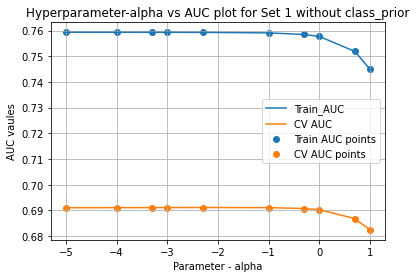

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.037562,4.093055e-03,0.010330,0.000454,1e-05,{'alpha': 1e-05},0.695015,0.683736,0.694355,0.691035,0.005169,6,0.752394,0.761801,0.763819,0.759338,0.004979
8,0.029594,4.757529e-04,0.009635,0.000466,0.0001,{'alpha': 0.0001},0.695094,0.683738,0.694355,0.691063,0.005188,5,0.752381,0.761773,0.763818,0.759324,0.004980
4,0.041223,3.291131e-03,0.013963,0.002936,0.0005,{'alpha': 0.0005},0.695157,0.683744,0.694355,0.691085,0.005201,3,0.752369,0.761745,0.763817,0.759310,0.004981
9,0.029920,9.602742e-07,0.009987,0.000819,0.001,{'alpha': 0.001},0.695182,0.683745,0.694354,0.691094,0.005207,2,0.752361,0.761731,0.763816,0.759303,0.004982
7,0.028921,2.468704e-05,0.009639,0.000453,0.005,{'alpha': 0.005},0.695236,0.683751,0.694351,0.691113,0.005218,1,0.752339,0.761688,0.763809,0.759279,0.004983


In [35]:
#SET1
#Classifier = Multinomial Naive Bayes without class_prior
#Hyperparameter tuning = Random Search CV method

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
import math

mnb = MultinomialNB() #class_prior is not used to define mnb
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
alphas = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]


clf = RandomizedSearchCV(mnb, parameters, cv=3, scoring= 'roc_auc', return_train_score= True)
clf.fit(X_tr_1,Y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
#print(results)
results = results.sort_values(['param_alpha'])


train_auc = results['mean_train_score']
cv_auc = results['mean_test_score']
alpha = results['param_alpha']
#print(alpha)
log_alpha = [math.log10(i) for i in alpha]
#print(log_alpha)

plt.plot(log_alpha, train_auc, label="Train_AUC")
plt.plot(log_alpha, cv_auc, label ="CV AUC")

plt.scatter(log_alpha, train_auc, label="Train AUC points")
plt.scatter(log_alpha, cv_auc, label="CV AUC points")


#plt.subplot(2, 1, 2) # Use this if you just want to see just the scatter plot use the next two lines of code
#plt.scatter(alpha, train_auc, label="Train AUC points")
#plt.scatter(alpha, cv_auc, label="CV AUC points")


plt.title("Hyperparameter-alpha vs AUC plot for Set 1 without class_prior")
plt.xlabel("Parameter - alpha")
plt.ylabel("AUC vaules")
plt.legend()
plt.grid()
plt.show()


results.head(5)


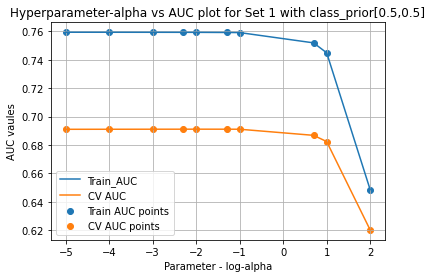

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
4,0.039906,0.002923,0.009960,8.139416e-04,1e-05,{'alpha': 1e-05},0.695014,0.683736,0.694356,0.691036,0.005168,7,0.752394,0.761800,0.763818,0.759337,0.004978
6,0.034907,0.000815,0.010306,4.700217e-04,0.0001,{'alpha': 0.0001},0.695093,0.683739,0.694356,0.691063,0.005188,6,0.752382,0.761772,0.763818,0.759324,0.004979
1,0.033571,0.000466,0.009309,4.713704e-04,0.001,{'alpha': 0.001},0.695181,0.683746,0.694356,0.691094,0.005207,4,0.752362,0.761730,0.763816,0.759302,0.004981
2,0.034573,0.001703,0.009635,4.764290e-04,0.005,{'alpha': 0.005},0.695235,0.683752,0.694353,0.691113,0.005218,2,0.752339,0.761687,0.763808,0.759278,0.004982
0,0.033909,0.000814,0.008976,1.123916e-07,0.01,{'alpha': 0.01},0.695258,0.683754,0.694348,0.691120,0.005222,1,0.752323,0.761661,0.763799,0.759261,0.004983


In [38]:
#SET1
#Classifier = Multinomial Naive Bayes with class_prior
#Hyperparameter tuning = Random Search CV method

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

mnb = MultinomialNB(class_prior = [0.5,0.5]) #class_prior is used to define mnb
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = RandomizedSearchCV(mnb, parameters, cv=3, scoring= 'roc_auc', return_train_score= True)
clf.fit(X_tr_1,Y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])


train_auc = results['mean_train_score']
cv_auc = results['mean_test_score']
alpha = results['param_alpha']

log_alpha = [math.log10(i) for i in alpha]
#print(alpha)
#print(log_alpha)
plt.plot(log_alpha, train_auc, label="Train_AUC")
plt.plot(log_alpha, cv_auc, label ="CV AUC")

plt.scatter(log_alpha, train_auc, label="Train AUC points")
plt.scatter(log_alpha, cv_auc, label="CV AUC points")

#plt.subplot(2, 1, 1)
#plt.plot(alpha, train_auc, label="Train_AUC")
#plt.plot(alpha, cv_auc, label ="CV AUC")

#plt.scatter(alpha, train_auc, label="Train AUC points")
#plt.scatter(alpha, cv_auc, label="CV AUC points")


#plt.subplot(2, 1, 2) # Use this if you just want to see just the scatter plot use the next two lines of code
#plt.scatter(alpha, train_auc, label="Train AUC points")
#plt.scatter(alpha, cv_auc, label="CV AUC points")


plt.title("Hyperparameter-alpha vs AUC plot for Set 1 with class_prior[0.5,0.5]")
plt.xlabel("Parameter - log-alpha")
plt.ylabel("AUC vaules")
plt.legend()
plt.grid()
plt.show()


results.head(5)

<h3>Conclusion for using class_prior</h3>
 <br>No differnce in the curves and  best alpha value obtained whether class_prior =[0.5,0.50] was used.  In both cases alpha = 100 was determined to be best.

In [39]:
#Best value of Alpha Hyperparamater
#Choose value #Best value of Alpha Hyperparamater
#Choose value from the graph based on  1. Maximum value of AUC on CV vurve and 2. Minimum gap between train and CV AUC
#best_alpha = 100from the graph based on  1. Maximum value of AUC on CV vurve and 2. Minimum gap between train and CV AUC
best_alpha = 5 #(log_alpha = 0 in the graph )

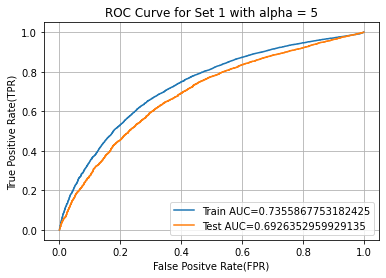

In [40]:
#Testing perfomance of the model on the test data, plotting ROC curves 
#SET 1 with best alpha

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc

mnb1 = MultinomialNB(alpha =best_alpha)
mnb1.fit(X_tr_1, Y_train)

Y_train_1_pred = mnb1.predict_proba(X_tr_1)[:,1] # This will give us the first value , i.e. P(yi=1) as we need only that for the ROC_AUC curve
Y_test_1_pred = mnb1.predict_proba(X_te_1)[:,1]

#print(Y_train_pred)

train_1_fpr, train_1_tpr , train_1_thresholds = roc_curve(Y_train, Y_train_1_pred)
test_1_fpr, test_1_tpr , test_2_thresholds = roc_curve(Y_test, Y_test_1_pred)
#print(train_1_thresholds)

plt.plot(train_1_fpr, train_1_tpr, label="Train AUC="+str(auc(train_1_fpr, train_1_tpr)))
plt.plot(test_1_fpr, test_1_tpr, label="Test AUC="+str(auc(test_1_fpr, test_1_tpr)))

plt.xlabel("False Positve Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve for Set 1 with alpha = 5")
plt.legend()
plt.grid()
plt.show()


In [41]:
# Find best threshold
# Code copied from Applied AI Reference Sample Code provided for Naive Bayes Assignment

def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print(t)
    print("The maximum value of tpr*(i-fpr) =", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba,threshold):
    predictions = []
    for i in proba:
        if i>= threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [42]:
# CALCULATING THE CONFUSION MATRIX for both SET 1

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(train_1_thresholds, train_1_fpr, train_1_tpr)
#print(best_t)

print("\n")
print("Train Confusion Matrix:")
CM_train_1 =confusion_matrix(Y_train, predict_with_best_t(Y_train_1_pred, best_t))
print(CM_train_1)
print("\n")
print("Test Confusion Matrix:")
CM_test_1 = confusion_matrix(Y_test, predict_with_best_t(Y_test_1_pred, best_t))
print(CM_test_1)


0.8319631439286825
The maximum value of tpr*(i-fpr) = 0.46349279560288065 for threshold 0.832


Train Confusion Matrix:
[[ 3696  1669]
 [ 9206 18929]]


Test Confusion Matrix:
[[1664  978]
 [4679 9179]]


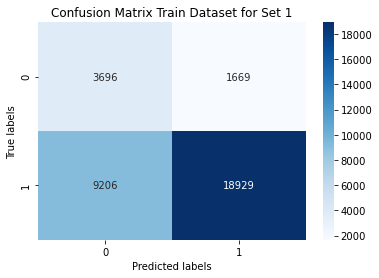

In [43]:
# Heat map of Train Dataset Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_train_1, annot=True,fmt="d",cmap='Blues',ax=ax);
#CM1_percentage = CM1/np.sum(CM1)
#print(CM1_percentage)
#sns.heatmap(CM1_percentage, annot=True,fmt=".2%",cmap='Blues',ax=ax);

#sns.heatmap(CM1, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix Train Dataset for Set 1');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

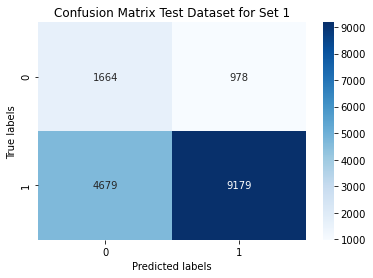

In [44]:
# Heat map of Test Dataset Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_test_1, annot=True,fmt="d",cmap='Blues',ax=ax);
#CM1_percentage = CM1/np.sum(CM1)
#print(CM1_percentage)
#sns.heatmap(CM1_percentage, annot=True,fmt=".2%",cmap='Blues',ax=ax);

#sns.heatmap(CM1, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix Test Dataset for Set 1');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

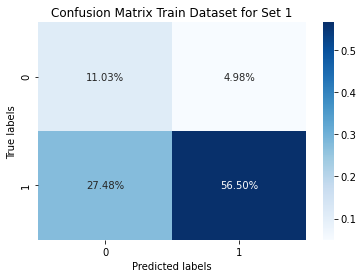

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(CM_train_1, annot=True,fmt="d",cmap='Blues',ax=ax);
CM_train_1_percentage = CM_train_1/np.sum(CM_train_1)
#print(CM1_percentage)
sns.heatmap(CM_train_1_percentage, annot=True,fmt=".2%",cmap='Blues',ax=ax);

#sns.heatmap(CM1, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix Train Dataset for Set 1');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

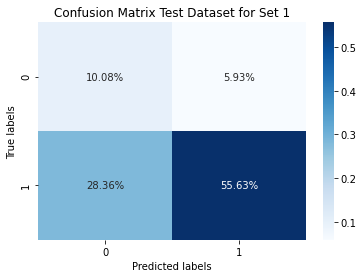

In [46]:
# COnfusion Matrx in terms of percentage for Test Datase for Set 1
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(CM_train_1, annot=True,fmt="d",cmap='Blues',ax=ax);
CM_test_1_percentage = CM_test_1/np.sum(CM_test_1)
#print(CM1_percentage)
sns.heatmap(CM_test_1_percentage, annot=True,fmt=".2%",cmap='Blues',ax=ax);

#sns.heatmap(CM1, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix Test Dataset for Set 1');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

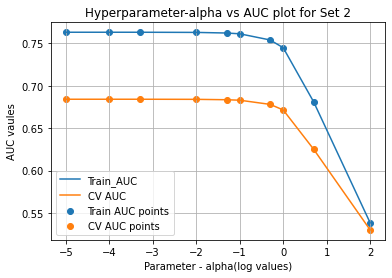

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,0.036280,0.000942,0.011254,0.001893,1e-05,{'alpha': 1e-05},0.686485,0.675717,0.690419,0.684207,0.006214,1,0.756642,0.764949,0.768073,0.763221,0.004824
0,0.037274,0.005443,0.009268,0.000480,0.0001,{'alpha': 0.0001},0.686484,0.675717,0.690417,0.684206,0.006214,2,0.756640,0.764947,0.768071,0.763220,0.004824
7,0.039540,0.004448,0.010958,0.000830,0.0005,{'alpha': 0.0005},0.686479,0.675713,0.690414,0.684202,0.006214,3,0.756633,0.764940,0.768063,0.763212,0.004823
9,0.037904,0.009433,0.008856,0.006551,0.01,{'alpha': 0.01},0.686354,0.675609,0.690304,0.684089,0.006209,4,0.756473,0.764763,0.767871,0.763036,0.004811
5,0.036561,0.000472,0.009994,0.000016,0.05,{'alpha': 0.05},0.685868,0.675149,0.689850,0.683622,0.006208,5,0.755792,0.764040,0.767074,0.762302,0.004767


In [53]:
#  SET 2
#Multinomial Naive Bayes with class_prior=[0.5,0.5] 
#Random Search CV method for SET2

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

mnb2 = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = RandomizedSearchCV(mnb2, parameters, cv=3, scoring= 'roc_auc', return_train_score= True)
clf.fit(X_tr_2,Y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])


train_auc = results['mean_train_score']
cv_auc = results['mean_test_score']
alpha = results['param_alpha']
#print(alpha)
log_alpha = [math.log10(i) for i in alpha]
#print(log_alpha)

#plt.subplot(2, 1, 1)
plt.plot(log_alpha, train_auc, label="Train_AUC")
plt.plot(log_alpha, cv_auc, label ="CV AUC")

plt.scatter(log_alpha, train_auc, label="Train AUC points")
plt.scatter(log_alpha, cv_auc, label="CV AUC points")


#plt.subplot(2, 1, 2) # Use the following two lines when you want to just see the scatter plot only
#plt.scatter(alpha, train_auc, label="Train AUC points")
#plt.scatter(alpha, cv_auc, label="CV AUC points")

plt.title("Hyperparameter-alpha vs AUC plot for Set 2")
plt.xlabel("Parameter - alpha(log values)")
plt.ylabel("AUC vaules")

plt.legend()
plt.grid()
plt.show()

results.head(5)


In [50]:
#Best value of Alpha Hyperparamater
#Choose value from the graph based on  1. Maximum value of AUC on CV vurve and 2. Minimum gap between train and CV AUC
best_alpha = 1 #The log_alpha = 0 on graph gave best results and its corresponding alpha value was 1
#if best_alpha = 3, the samre results were obtained

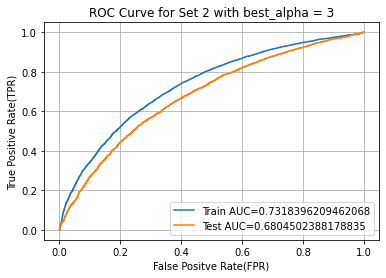

In [54]:
#Testing perfomance of the model on the test data, plotting ROC curves
#SET 2

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc

mnb2 = MultinomialNB(alpha = best_alpha)
mnb2.fit(X_tr_2, Y_train)

Y_train_2_pred = mnb2.predict_proba(X_tr_2)[:,1] # This will give us the first value , i.e. P(yi=1) as we need only that for the ROC_AUC curve
Y_test_2_pred = mnb2.predict_proba(X_te_2)[:,1]

#print(Y_train_pred)

train_2_fpr, train_2_tpr , train_2_thresholds = roc_curve(Y_train, Y_train_2_pred)
test_2_fpr, test_2_tpr , test_2_thresholds = roc_curve(Y_test, Y_test_2_pred)

plt.plot(train_2_fpr, train_2_tpr, label="Train AUC="+str(auc(train_2_fpr, train_2_tpr)))
plt.plot(test_2_fpr, test_2_tpr, label="Test AUC="+str(auc(test_2_fpr, test_2_tpr)))

plt.xlabel("False Positve Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve for Set 2 with best_alpha = 3")
plt.legend()
plt.grid()
plt.show()


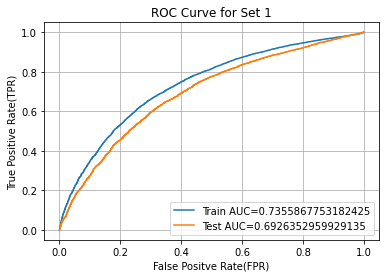

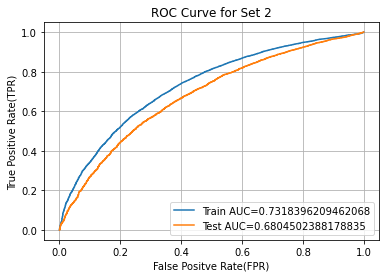

In [55]:
#Combined ROCplots for Set 1 and Set 2

plt.plot(train_1_fpr, train_1_tpr, label="Train AUC="+str(auc(train_1_fpr, train_1_tpr)))
plt.plot(test_1_fpr, test_1_tpr, label="Test AUC="+str(auc(test_1_fpr, test_1_tpr)))

plt.xlabel("False Positve Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve for Set 1")
plt.legend()
plt.grid()
plt.show()


train_2_fpr, train_2_tpr , train_2_thresholds = roc_curve(Y_train, Y_train_2_pred)
test_2_fpr, test_2_tpr , test_2_thresholds = roc_curve(Y_test, Y_test_2_pred)

plt.plot(train_2_fpr, train_2_tpr, label="Train AUC="+str(auc(train_2_fpr, train_2_tpr)))
plt.plot(test_2_fpr, test_2_tpr, label="Test AUC="+str(auc(test_2_fpr, test_2_tpr)))

plt.xlabel("False Positve Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve for Set 2")
plt.legend()
plt.grid()
plt.show()

In [56]:
# CALCULATING THE CONFUSION MATRIX for both SET 2
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(train_2_thresholds, train_2_fpr, train_2_tpr)
print("Train Confusion Matrix:")
CM_train_2 = confusion_matrix(Y_train, predict_with_best_t(Y_train_2_pred, best_t))
print(CM_train_2)
print("\n")
print("Test Confusion Matrix:")
CM_test_2 =confusion_matrix(Y_test, predict_with_best_t(Y_test_2_pred, best_t))
print(CM_test_2)

0.8415674480690267
The maximum value of tpr*(i-fpr) = 0.4526922667322096 for threshold 0.842
Train Confusion Matrix:
[[ 3574  1791]
 [ 9016 19119]]


Test Confusion Matrix:
[[1596 1046]
 [4656 9202]]


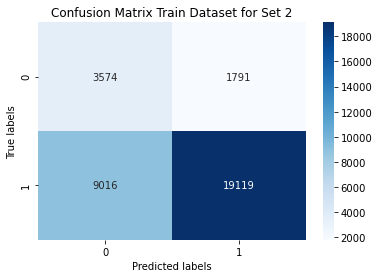

In [57]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_train_2, annot=True,fmt="d",cmap='Blues',ax=ax);
#CM1_percentage = CM1/np.sum(CM1)
#print(CM1_percentage)
#sns.heatmap(CM1_percentage, annot=True,fmt=".2%",cmap='Blues',ax=ax);

#sns.heatmap(CM1, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix Train Dataset for Set 2');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

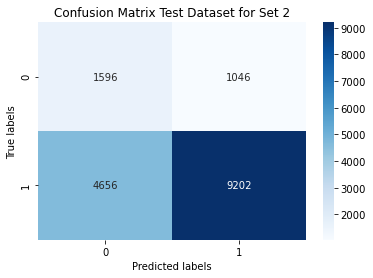

In [58]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

#Confusion Matrix - SET 2 Test

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_test_2, annot=True,fmt="d",cmap='Blues',ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix Test Dataset for Set 2');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

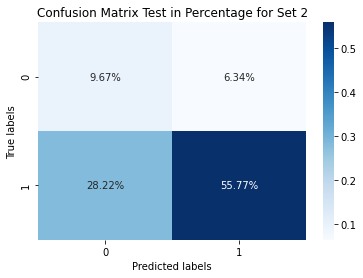

In [59]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(CM_test_2, annot=True,fmt="d",cmap='Blues',ax=ax);
CM_test_2_percentage = CM_test_2/np.sum(CM_test_2)
#print(CM_test_2_percentage)
sns.heatmap(CM_test_2_percentage, annot=True,fmt=".2%",cmap='Blues',ax=ax);

#sns.heatmap(CM1, annot=True,fmt="d",cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix Test in Percentage for Set 2');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

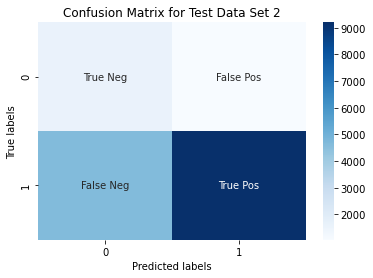

In [60]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_test_2, annot=labels ,fmt='',cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix for Test Data Set 2');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);

In [61]:
#SET 1 Get All Feature Names:
set_1_all_feature_names =[]
for i in vectorizer_essay_1.get_feature_names():
    set_1_all_feature_names.append(i)
    
for i in vectorizer_tea_pre.get_feature_names():
    set_1_all_feature_names.append(i)  
    
for i in vectorizer_pro_gra_ohe.get_feature_names():
    set_1_all_feature_names.append(i)
    
for i in vectorizer_state_ohe.get_feature_names():
    set_1_all_feature_names.append(i)

for i in vectorizer_clean_cat_ohe.get_feature_names():
    set_1_all_feature_names.append(i)
    
#print(len(set_1_all_feature_names))


set_1_all_feature_names.append('Price')
set_1_all_feature_names.append('teacher_number_of_previously_posted_projects')

print("Total number of features in Set 1 is:",len(set_1_all_feature_names))
print("Shape of X_tr_1 is ",X_tr_1.shape)

Total number of features in Set 1 is: 5071
Shape of X_tr_1 is  (33500, 5071)


In [62]:
#SET 2 Get All Feature Names:

set_2_all_feature_names =[]
for i in vectorizer_essay_1.get_feature_names():
    set_2_all_feature_names.append(i)
    
for i in vectorizer_tea_pre.get_feature_names():
    set_2_all_feature_names.append(i)  
    
for i in vectorizer_pro_gra_ohe.get_feature_names():
    set_2_all_feature_names.append(i)
    
for i in vectorizer_state_ohe.get_feature_names():
    set_2_all_feature_names.append(i)

for i in vectorizer_clean_cat_ohe.get_feature_names():
    set_2_all_feature_names.append(i)
    
#print(len(set_2_all_feature_names))


set_2_all_feature_names.append('Price')
set_2_all_feature_names.append('teacher_number_of_previously_posted_projects')

print("Total number of features in Set 2is :",len(set_2_all_feature_names))
print("Shape of X_tr_2 is", X_tr_2.shape)

Total number of features in Set 2is : 5071
Shape of X_tr_2 is (33500, 5071)


In [63]:

#print top negative features for SET1 and SET 2

import math
# mnb1 is MultinomialNB for set 1
negative_probabilities = mnb1.feature_log_prob_[0]
#print(negative_probabilities)
negative_indices_sorted = negative_probabilities.argsort()
#print(negative_indices_sorted)
#Reverse the order
negative_indices_sorted = np.flip(negative_indices_sorted)
#print(negative_indices_sorted)
print("Top ten NEGATIVE features for SET 1")
print("Index ---- feature----probability value")
for i in range (10):
    index = negative_indices_sorted[i]
    feature = set_1_all_feature_names[index]
    probability = negative_probabilities[index] 
    #probabilites are given in log format so calculate exp() for them to get the Probability values
    probability = math.exp(probability)
    print(index,'------',feature,'-----', probability)
    
print("="*100)

# mnb2 is MultinomialNB for set 2
negative_probabilities = mnb2.feature_log_prob_[0]
#print(negative_probabilities)
negative_indices_sorted = negative_probabilities.argsort()
#print(negative_indices_sorted)
#Reverse the order
negative_indices_sorted = np.flip(negative_indices_sorted)
#print(negative_indices_sorted)
print("Top ten POSITIVE features for SET 2")
print("Index ---- feature----probability value")
for i in range (10):
    index = negative_indices_sorted[i]
    feature = set_2_all_feature_names[index]
    probability = negative_probabilities[index]
    probability = math.exp(probability)
    print(index,'------',feature,'-----', probability)
    

Top ten NEGATIVE features for SET 1
Index ---- feature----probability value
3997 ------ students ----- 0.03928936673209665
3583 ------ school ----- 0.013163633292833227
2299 ------ learning ----- 0.009948699766880023
2762 ------ my ----- 0.009032736948042954
674 ------ classroom ----- 0.008636068532900464
2913 ------ not ----- 0.007003543415741481
2241 ------ learn ----- 0.006870254297750057
4460 ------ they ----- 0.006417071296579208
1858 ------ help ----- 0.006413872357747419
4400 ------ the ----- 0.006276317987980262
Top ten POSITIVE features for SET 2
Index ---- feature----probability value
5002 ------ mrs ----- 0.03357284029228785
5064 ------ literacy_language ----- 0.028563597864283932
5008 ------ grades_prek_2 ----- 0.027459866481842392
5065 ------ math_science ----- 0.025288790465830997
5003 ------ ms ----- 0.023687773515476223
5005 ------ grades_3_5 ----- 0.021310505922525202
5062 ------ health_sports ----- 0.010891766828928652
5006 ------ grades_6_8 ----- 0.010176160767785226

In [64]:
#print top negative features for SET1 and SET 2
import math
# mnb1 is MultinomialNB for set 1
negative_probabilities = mnb1.feature_log_prob_[1]
#print(negative_probabilities)
negative_indices_sorted = negative_probabilities.argsort()
#print(negative_indices_sorted)
#Reverse the order
negative_indices_sorted = np.flip(negative_indices_sorted)
#print(negative_indices_sorted)
print("Top ten NEGATIVE features for SET 1")
print("Index ---- feature----probability value")
for i in range (10):
    index = negative_indices_sorted[i]
    feature = set_1_all_feature_names[index]
    probability = negative_probabilities[index] 
    #probabilites are given in log format so calculate exp() for them to get the Probability values
    probability = math.exp(probability)
    print(index,'------',feature,'-----', probability)
    
print("="*100)

# mnb2 is MultinomialNB for set 2
negative_probabilities = mnb2.feature_log_prob_[1]
#print(negative_probabilities)
negative_indices_sorted = negative_probabilities.argsort()
#print(negative_indices_sorted)
#Reverse the order
negative_indices_sorted = np.flip(negative_indices_sorted)
#print(negative_indices_sorted)
print("\nTop ten POSITIVE features for SET 2")
print("Index ---- feature----probability value")
for i in range (10):
    index = negative_indices_sorted[i]
    feature = set_2_all_feature_names[index]
    probability = negative_probabilities[index]
    probability = math.exp(probability)
    print(index,'------',feature,'-----', probability)
    

Top ten NEGATIVE features for SET 1
Index ---- feature----probability value
3997 ------ students ----- 0.04034193223263942
3583 ------ school ----- 0.01282369840531816
2762 ------ my ----- 0.009332365470192582
674 ------ classroom ----- 0.009050463859951695
2299 ------ learning ----- 0.00901870852997985
4400 ------ the ----- 0.007103258196954088
2913 ------ not ----- 0.006717713423860302
4460 ------ they ----- 0.006551533690940147
2241 ------ learn ----- 0.006450033525815415
2782 ------ my students ----- 0.00632749301935963

Top ten POSITIVE features for SET 2
Index ---- feature----probability value
5002 ------ mrs ----- 0.03644710429539556
5064 ------ literacy_language ----- 0.03255148119576926
5008 ------ grades_prek_2 ----- 0.027741921888656675
5065 ------ math_science ----- 0.02411016488567993
5003 ------ ms ----- 0.02359922417125851
5005 ------ grades_3_5 ----- 0.023234609201342737
5062 ------ health_sports ----- 0.01235612967129015
5006 ------ grades_6_8 ----- 0.01013965445943379

In [ ]:
clf = RandomizedSearchCV(dt, parameters, cv=3, scoring= 'roc_auc', return_train_score= True, n_jobs = -1)


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [76]:
columns = ["Vectorizer","Model" , "Hyperparameter", "AUC"]

results = pd.DataFrame(columns = columns)
results['Vectorizer'] = ["Bag of words", "tfidf"]
results["Model"] = ["RandomSearchCV", "RandomSearchCV"]
results['Hyperparameter'] = ["alpha= 5", "alpha = 1"]
results['AUC'] = [0.69,0.68]
results 



,Vectorizer,Model,Hyperparameter,AUC
0,Bag of words,RandomSearchCV,alpha= 5,0.69
1,tfidf,RandomSearchCV,alpha = 1,0.68


<br> CONCULSIONS
<br> 1. Using the class_prior [0.5,0.5] did not change the value of the best paramter obtained and also the test AUC value
<br> 2. BOW (bag of words) and tfidf worked equally well and provided approximately same AUC
<br> 3. Memory constraints allowed use of only 50K data points. Howver if 1000K data points could be taken, there may have been a chance to increase AUC values